In [ ]:
!pip install gower
!pip install xgboost

In [121]:
import pandas as pd
import numpy as np
# visual
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.metrics import confusion_matrix, rand_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import NuSVC



## Import Data

In [122]:
lst_str_cols = ['move']
dict_dtypes = {x: 'str' for x in lst_str_cols}
data = pd.read_csv('preprocessed_encoded_rocket_league_skillshots.csv', dtype=dict_dtypes)
df = pd.DataFrame(data = data)
df = df.drop(['Unnamed: 0', 'goal'], axis = 1)

In [123]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,Class,move
0,0.522863,0.000000,0.012304,0.498257,0.025869,0.453272,0.300277,5,3
1,0.525408,0.010311,0.012290,0.498257,0.018490,0.540155,0.309974,5,22
2,0.520195,0.012889,0.012290,0.498257,0.019278,0.540155,0.312201,5,18
3,0.536357,0.023200,0.012311,0.498257,0.010238,0.501020,0.342262,5,2
4,0.529825,0.046400,0.012387,0.498262,0.010521,0.543821,0.360175,5,3


In [124]:
df['move'] = df["move"].astype("int")
df['move'].dtypes

dtype('int64')

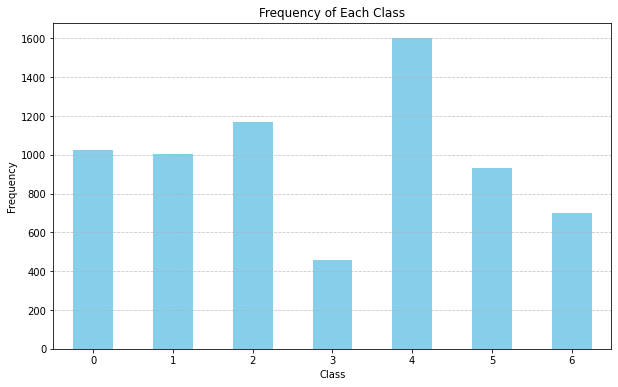

In [125]:
# Plotting the histogram of the frequency of each class including -1
plt.figure(figsize=(10, 6))
df['Class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the class labels horizontal for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [126]:
df_no_target = df.drop(columns=['Class'])

# Classification with outliers

In [127]:
df_target = df[['Class']]
df_no_target.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,move
0,0.522863,0.000000,0.012304,0.498257,0.025869,0.453272,0.300277,3
1,0.525408,0.010311,0.012290,0.498257,0.018490,0.540155,0.309974,22
2,0.520195,0.012889,0.012290,0.498257,0.019278,0.540155,0.312201,18
3,0.536357,0.023200,0.012311,0.498257,0.010238,0.501020,0.342262,2
4,0.529825,0.046400,0.012387,0.498262,0.010521,0.543821,0.360175,3


In [128]:
# train test split data 80%-20%

X = df_no_target
y = df['Class']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Decision Tree Classifier

### Testing parameters for DTC

In [130]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 100, 300, 500, 1000],
    'min_samples_split': [1.0, 10, 100, 300, 500, 1000],
    'min_samples_leaf': [1, 10, 100, 300, 500, 1000]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3, cv=3, n_jobs = -1, error_score='raise')

# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 100, 300, 500, 1000],
                         'min_samples_leaf': [1, 10, 100, 300, 500, 1000],
                         'min_samples_split': [1.0, 10, 100, 300, 500, 1000]},
             verbose=3)

In [132]:
df_grid_dt = pd.DataFrame(grid.cv_results_)
df_grid_dt.nlargest(5, ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
216,0.030516,0.012329,0.003153,0.000124,entropy,1,1,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.347661,0.348205,0.340229,0.345365,0.003638,367
217,0.021451,0.000052,0.003223,0.000090,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.347661,0.348205,0.340229,0.345365,0.003638,367
218,0.021681,0.000114,0.003205,0.000140,entropy,1,1,100,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.347661,0.348205,0.340229,0.345365,0.003638,367
219,0.021250,0.000015,0.003152,0.000126,entropy,1,1,300,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.347661,0.348205,0.340229,0.345365,0.003638,367
220,0.021348,0.000100,0.003176,0.000033,entropy,1,1,500,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.347661,0.348205,0.340229,0.345365,0.003638,367


In [133]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=1000, min_samples_split=10)


In [134]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       213
           1       0.75      0.76      0.75       209
           2       0.77      0.73      0.75       221
           3       0.78      0.81      0.80        96
           4       0.80      0.76      0.78       327
           5       0.55      0.60      0.57       173
           6       0.52      0.51      0.51       140

    accuracy                           0.68      1379
   macro avg       0.67      0.67      0.67      1379
weighted avg       0.68      0.68      0.68      1379



In [135]:
cm = confusion_matrix(y_test, grid_predictions)

In [136]:
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

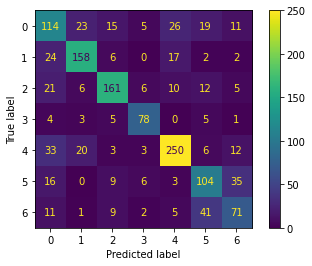

In [137]:
cm_graph.plot()
plt.show()

## Random Forest Classifier

### Testing parameters

In [140]:
### Testing parameters for RFC
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 100, 1000],
    'min_samples_split': [1.0, 10, 100, 1000],
    'min_samples_leaf': [1, 10, 100, 1000]
}

In [141]:
grid = HalvingGridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=3, cv=3, n_jobs=-1, scoring='accuracy', error_score='raise')
%time grid.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 68
max_resources_: 5513
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 128
n_resources: 68
Fitting 3 folds for each of 128 candidates, totalling 384 fits
----------
iter: 1
n_candidates: 43
n_resources: 204
Fitting 3 folds for each of 43 candidates, totalling 129 fits
----------
iter: 2
n_candidates: 15
n_resources: 612
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 5
n_resources: 1836
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 5508
Fitting 3 folds for each of 2 candidates, totalling 6 fits
CPU times: user 6.2 s, sys: 266 ms, total: 6.47 s
Wall time: 20 s


HalvingGridSearchCV(cv=3, error_score='raise',
                    estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': [1, 10, 100, 1000],
                                'min_samples_leaf': [1, 10, 100, 1000],
                                'min_samples_split': [1.0, 10, 100, 1000]},
                    refit=<function _refit_callable at 0x2b04a9533048>,
                    scoring='accuracy', verbose=3)

In [142]:
df_grid_rf = pd.DataFrame(grid.cv_results_)
df_grid_rf.nlargest(5, ['rank_test_score'])

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,68,0.170381,0.000589,0.021257,0.002629,gini,1,1,1,...,0.136364,0.090909,0.151515,0.056692,84,0.288889,0.244444,0.222222,0.251852,0.027716
2,0,68,0.169145,0.000560,0.019422,0.000097,gini,1,1,100,...,0.136364,0.090909,0.151515,0.056692,84,0.288889,0.244444,0.222222,0.251852,0.027716
3,0,68,0.176201,0.007777,0.019490,0.000206,gini,1,1,1000,...,0.136364,0.090909,0.151515,0.056692,84,0.288889,0.244444,0.222222,0.251852,0.027716
4,0,68,0.171156,0.000806,0.019712,0.000274,gini,1,10,1,...,0.136364,0.090909,0.151515,0.056692,84,0.288889,0.244444,0.222222,0.251852,0.027716
6,0,68,0.177416,0.010567,0.019572,0.000127,gini,1,10,100,...,0.136364,0.090909,0.151515,0.056692,84,0.288889,0.244444,0.222222,0.251852,0.027716


In [143]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
RandomForestClassifier(criterion='entropy', max_depth=1000,
                       min_samples_split=10)


In [144]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       213
           1       0.82      0.86      0.84       209
           2       0.80      0.91      0.85       221
           3       0.94      0.83      0.88        96
           4       0.86      0.88      0.87       327
           5       0.60      0.78      0.68       173
           6       0.61      0.61      0.61       140

    accuracy                           0.78      1379
   macro avg       0.78      0.76      0.76      1379
weighted avg       0.79      0.78      0.77      1379



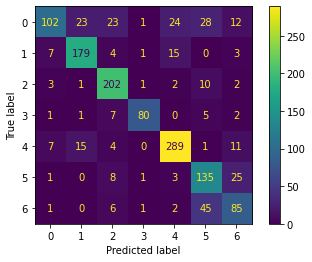

In [145]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_graph.plot()
plt.show()

## Support Vector Machine (SVM)

### Support Vector Classification (SVC)

In [146]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [147]:
grid = HalvingGridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=3, scoring='accuracy', n_jobs = -1)

%time grid.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 612
max_resources_: 5513
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 612
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 9
n_resources: 1836
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 5508
Fitting 3 folds for each of 3 candidates, totalling 9 fits
CPU times: user 5.9 s, sys: 50.2 ms, total: 5.95 s
Wall time: 11.8 s


HalvingGridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                    param_grid={'C': [0.1, 1, 10, 100, 1000],
                                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                'kernel': ['rbf']},
                    refit=<function _refit_callable at 0x2b04a9533048>,
                    scoring='accuracy', verbose=3)

In [148]:
df_grid_svc_rbf = pd.DataFrame(grid.cv_results_)
df_grid_svc_rbf.nlargest(5, ['rank_test_score'])

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,612,0.025406,0.001154,0.011697,0.001137,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",...,0.235294,0.216749,0.238916,0.019745,36,0.253071,0.265356,0.235294,0.251241,0.012341
4,0,612,0.027260,0.000727,0.011611,0.000880,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",...,0.235294,0.216749,0.238916,0.019745,36,0.253071,0.265356,0.235294,0.251241,0.012341
3,0,612,0.027025,0.000566,0.011405,0.000396,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",...,0.235294,0.236453,0.245484,0.013600,35,0.253071,0.265356,0.274510,0.264312,0.008783
9,0,612,0.026499,0.000389,0.010738,0.000445,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",...,0.235294,0.241379,0.245492,0.010420,34,0.257985,0.270270,0.286765,0.271673,0.011791
1,0,612,0.028194,0.000250,0.012006,0.000589,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",...,0.235294,0.241379,0.248760,0.014949,33,0.260442,0.265356,0.281863,0.269220,0.009162


In [149]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [150]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.41      0.35      0.38       213
           1       0.67      0.64      0.65       209
           2       0.62      0.67      0.65       221
           3       0.75      0.55      0.63        96
           4       0.74      0.76      0.75       327
           5       0.53      0.68      0.60       173
           6       0.39      0.36      0.38       140

    accuracy                           0.60      1379
   macro avg       0.59      0.57      0.58      1379
weighted avg       0.60      0.60      0.60      1379



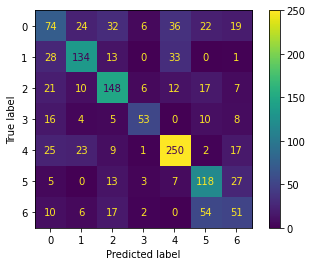

In [151]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

In [152]:
param_grid = {'C': [1, 5],
              'gamma': [2],
              'kernel': ['linear']}

In [153]:
grid = HalvingGridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=3, scoring='accuracy', n_jobs = -1)

%time grid.fit(X_train, y_train)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 5513
max_resources_: 5513
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2
n_resources: 5513
Fitting 3 folds for each of 2 candidates, totalling 6 fits
CPU times: user 50.9 s, sys: 27.6 ms, total: 51 s
Wall time: 1min 33s


HalvingGridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                    param_grid={'C': [1, 5], 'gamma': [2],
                                'kernel': ['linear']},
                    refit=<function _refit_callable at 0x2b04a9533048>,
                    scoring='accuracy', verbose=3)

In [154]:
df_grid_svc_linear = pd.DataFrame(grid.cv_results_)
df_grid_svc_linear.nlargest(5, ['rank_test_score'])

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,5513,17.986430,2.937904,0.204145,0.006497,1,2,linear,"{'C': 1, 'gamma': 2, 'kernel': 'linear'}",...,0.373776,0.394665,0.380739,0.009847,2,0.385578,0.362721,0.408868,0.385723,0.018840
1,0,5513,38.959391,2.639190,0.186999,0.007545,5,2,linear,"{'C': 5, 'gamma': 2, 'kernel': 'linear'}",...,0.383025,0.414807,0.394707,0.014275,1,0.401361,0.379320,0.437976,0.406219,0.024192


In [155]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 5, 'gamma': 2, 'kernel': 'linear'}
SVC(C=5, gamma=2, kernel='linear')


In [156]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.59      0.08      0.13       213
           1       0.44      0.13      0.21       209
           2       0.29      0.72      0.41       221
           3       0.62      0.43      0.51        96
           4       0.53      0.72      0.61       327
           5       0.25      0.32      0.28       173
           6       0.00      0.00      0.00       140

    accuracy                           0.39      1379
   macro avg       0.39      0.34      0.31      1379
weighted avg       0.40      0.39      0.33      1379



/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


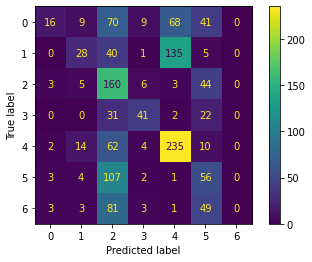

In [157]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

### Nu-Support Vector Classification (NuSVC)

In [158]:
param_grid = {'nu': [0.1, 0.2, 0.3, 0.4],
              'gamma': ['auto', 'scale'],
              'kernel': ['rbf']}

In [159]:
grid = HalvingGridSearchCV(NuSVC(), param_grid, refit=True, verbose=3, cv=3, n_jobs=-1, scoring='accuracy')

# fitting the model for grid search 
%time grid.fit(X_train, y_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1837
max_resources_: 5513
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 1837
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 1
n_candidates: 3
n_resources: 5511
Fitting 3 folds for each of 3 candidates, totalling 9 fits
CPU times: user 5.58 s, sys: 12.1 ms, total: 5.59 s
Wall time: 11.4 s


HalvingGridSearchCV(cv=3, estimator=NuSVC(), n_jobs=-1,
                    param_grid={'gamma': ['auto', 'scale'], 'kernel': ['rbf'],
                                'nu': [0.1, 0.2, 0.3, 0.4]},
                    refit=<function _refit_callable at 0x2b04a9533048>,
                    scoring='accuracy', verbose=3)

In [160]:
df_grid_nusvc_rbf = pd.DataFrame(grid.cv_results_)
df_grid_nusvc_rbf.nlargest(5, ['rank_test_score'])

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_kernel,param_nu,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,0,1837,0.076488,0.006448,0.040534,0.004949,scale,rbf,0.1,"{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}",...,0.178105,0.156863,0.159041,0.014756,11,0.159314,0.156046,0.166667,0.160675,0.004442
5,0,1837,0.113642,0.002620,0.054762,0.006083,scale,rbf,0.2,"{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.2}",...,0.248366,0.233660,0.241285,0.006016,10,0.240196,0.251634,0.236111,0.242647,0.006570
6,0,1837,0.147966,0.006160,0.061542,0.005851,scale,rbf,0.3,"{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.3}",...,0.294118,0.297386,0.275599,0.028531,9,0.259804,0.275327,0.321078,0.285403,0.026010
7,0,1837,0.169313,0.002494,0.066164,0.004429,scale,rbf,0.4,"{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.4}",...,0.300654,0.285948,0.302832,0.014756,8,0.315359,0.310458,0.314542,0.313453,0.002144
0,0,1837,0.276347,0.010402,0.068104,0.004364,auto,rbf,0.1,"{'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}",...,0.415033,0.392157,0.418301,0.022798,7,0.609477,0.644608,0.635621,0.629902,0.014901


In [161]:
print(grid.best_params_)
print(grid.best_estimator_)

{'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.3}
NuSVC(gamma='auto', nu=0.3)


In [162]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.39      0.34      0.37       213
           1       0.69      0.49      0.57       209
           2       0.49      0.74      0.59       221
           3       0.73      0.46      0.56        96
           4       0.71      0.74      0.72       327
           5       0.46      0.50      0.48       173
           6       0.33      0.29      0.30       140

    accuracy                           0.54      1379
   macro avg       0.54      0.51      0.51      1379
weighted avg       0.55      0.54      0.54      1379



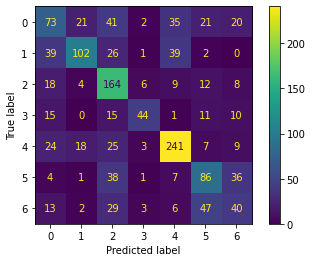

In [45]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

### Naive Bayes Classification

In [77]:
param_grid = {
    'alpha' : [1, 10, 100, 1000],
}

param_grid_gaussian = {
    'priors' : [6]
}
param_grid_multi = {
    'alpha' : [.01, 0.1, 1],
    'class_prior' : [7]
}

In [111]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(GaussianNB(), 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [112]:
gauss_nb_prediction = grid.predict(X_test)
print(classification_report(y_test, gauss_nb_prediction))

              precision    recall  f1-score   support

           0       1.00      0.08      0.16       213
           1       0.64      0.36      0.46       209
           2       0.38      0.48      0.42       221
           3       0.50      0.71      0.59        96
           4       0.60      0.68      0.64       327
           5       0.33      0.75      0.46       173
           6       0.39      0.18      0.25       140

    accuracy                           0.47      1379
   macro avg       0.55      0.46      0.42      1379
weighted avg       0.57      0.47      0.44      1379



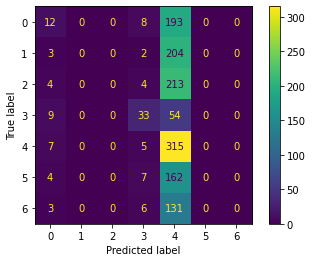

In [113]:
cm = confusion_matrix(y_test, multi_nb_prediction)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

In [107]:
params_NB = {'alpha': [0.01,0.1, 1, 10], 
            'fit_prior' : ['True', 'False'],
            }

grid = GridSearchCV(MultinomialNB(), 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_prior': ['True', 'False']},
             scoring='accuracy', verbose=1)

In [103]:
grid = HalvingGridSearchCV(MultinomialNB(), param_grid_multi, verbose = 3, cv = 3, n_jobs = -1, scoring = 'accuracy')
%time grid.fit(X_train, y_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1837
max_resources_: 5513
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 1837
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  category=UserWarning
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [nan nan nan]
  category=UserWarning


----------
iter: 1
n_candidates: 1
n_resources: 5511
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  category=UserWarning
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan]
  category=UserWarning


TypeError: object of type 'int' has no len()

In [48]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
df_grid_nb = pd.DataFrame(grid.cv_results_)
df_grid_nb.nlargest(5, ['rank_test_score'])

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()